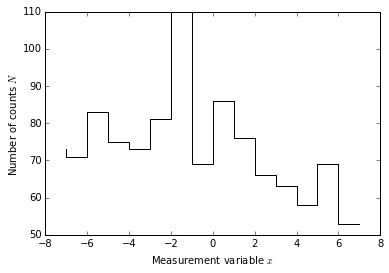

C:\Users\Abdul-Rahman\Anaconda2\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Abdul-Rahman\Anaconda2\lib\site-packages\ipykernel\__main__.py:76: RuntimeWarning: divide by zero encountered in log


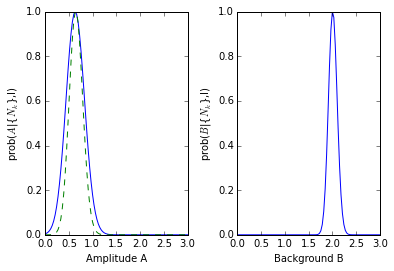

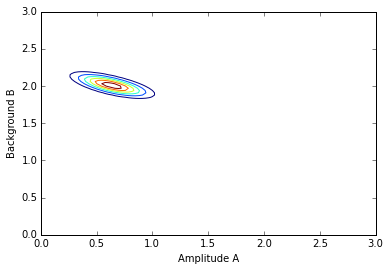

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random as rm

%matplotlib inline
def sAmp(dataBins,max_counts):
    x0 = 0.
    w = 5/2.35
    #dataBins=7
    #max_counts=100.
    
    res = np.zeros(dataBins)

    A=1;B=2
    xk= np.linspace(x0-dataBins/2,x0+dataBins/2,dataBins)

    D=A*np.exp( -( ( (xk-x0)**2.)/(2*(w**2) ) ) )+B
    n0=max_counts/(A+B)
    D*=n0

    for i in xrange(dataBins):
        res[i]=np.random.poisson(D[i],1)

    plt.step(xk,res,color='k')
    plt.xlabel(r'Measurement variable $x$')
    plt.ylabel('Number of counts $N$')
    plt.show()
    ###########################################################
    num=100
    arange = np.linspace(0,3,num)
    brange = np.linspace(0,3,num)
    Arange, Brange = np.meshgrid(arange,brange)
    l = np.zeros(shape=(num,num))
    lBKnown = np.zeros(shape=(num,num))

    d = np.zeros(dataBins)
    dBKnown = np.zeros(dataBins)
    
    accA = np.zeros(num)
    accABKnown = np.zeros(num)
    accB = np.zeros(num)
    
    sumx=0.

    for i in xrange(num):
        for j in xrange(num):
            d=Arange[i,j]*np.exp( -1*( ( (xk-x0)**2.)/(2*(w**2) ) ) )+Brange[i,j]
            dBKnown = Arange[i,j]*np.exp( -1*( ( (xk-x0)**2.)/(2*(w**2) ) ) )+2
            
            d*=n0
            dBKnown*=n0
            
            l[i,j]=sum(res*np.log(d)-d)
            lBKnown[i,j]=sum(res*np.log(dBKnown)-dBKnown)
            
            if l[i,j]<0:l[i,j]=0.
            if lBKnown[i,j]<0:lBKnown[i,j]=0.
    
    
    for i in xrange(num):
        accA[i]=sum(np.exp(l[:,i]-np.max(l)))
        accABKnown[i]=sum(np.exp(lBKnown[:,i]-np.max(lBKnown)))
        accB[i]=sum(np.exp(l[i,:]-np.max(l)))
        sumx=0.
    
    accA=np.log(accA)
    accA-=np.max(accA)
    
    accABKnown=np.log(accABKnown)
    accABKnown-=np.max(accABKnown)
    plt.subplot(1,2,1)
    plt.plot(arange, np.exp(accA))
    plt.plot(arange, np.exp(accABKnown), linestyle='--');plt.xlabel('Amplitude A');plt.ylabel(r'prob($A$|{$N_k$},I)')
    
    accB=np.log(accB)
    accB-=np.max(accB)
    plt.subplot(1,2,2)
    plt.subplots_adjust(wspace = .35)
    plt.plot(arange, np.exp(accB));plt.xlabel('Background B');plt.ylabel(r'prob($B$|{$N_k$},I)');plt.show()
    
    
    l-=np.max(l)
    l=np.exp(l)
    
    levels=np.linspace(np.min(l),np.max(l),5)
    cs=plt.contour(Arange, Brange, l)
    #ls=cs.collections[0].get_paths()
    plt.xlabel('Amplitude A')
    plt.ylabel('Background B')
    #plt.colorbar()
    plt.show()
###########################################
sAmp(15,100)

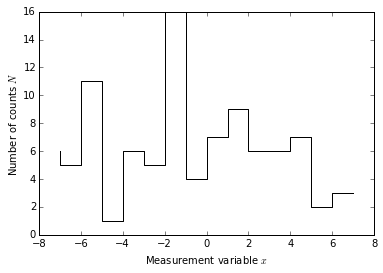

C:\Users\Abdul-Rahman\Anaconda2\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log


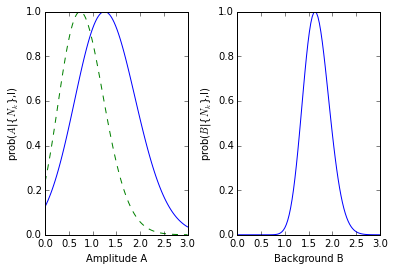

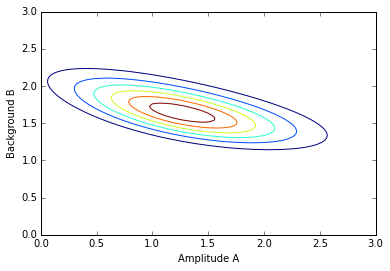

In [396]:
sAmp(15,10)

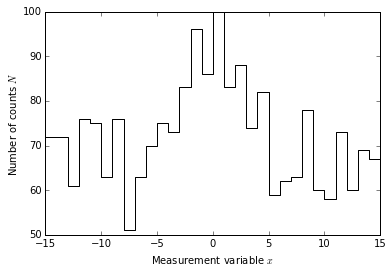

C:\Users\Abdul-Rahman\Anaconda2\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Abdul-Rahman\Anaconda2\lib\site-packages\ipykernel\__main__.py:76: RuntimeWarning: divide by zero encountered in log


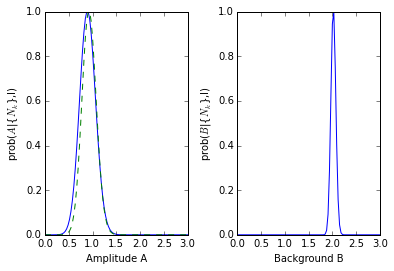

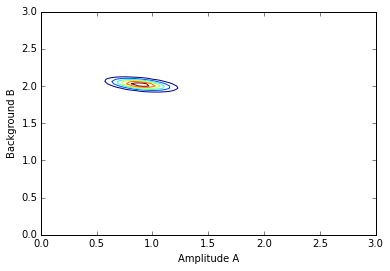

In [393]:
sAmp(31,100)

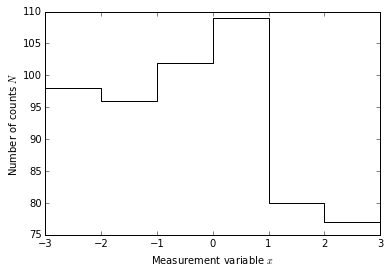

C:\Users\Abdul-Rahman\Anaconda2\lib\site-packages\ipykernel\__main__.py:54: RuntimeWarning: divide by zero encountered in log


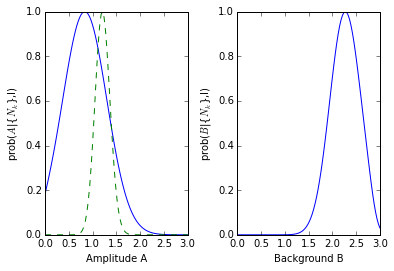

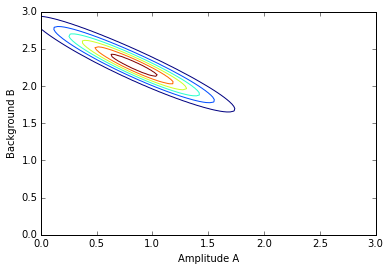

In [394]:
sAmp(7,100)